<a href="https://colab.research.google.com/github/iamgus123/dl19/blob/main/notebook/ch09_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers


input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(2, 3, activation='relu', input_shape=input_shape[1:])(x)
print(y.shape)


input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
y = layers.Conv2D(2, 3, activation='relu', padding="same", 
			input_shape=input_shape[1:])(x)
print(y.shape)


x = tf.constant([[1., 2., 3.],     [4., 5., 6.],     [7., 8., 9.]])
x = tf.reshape(x, [1, 3, 3, 1])
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), 
                                           strides=(1, 1), padding='valid')
print(max_pool_2d(x))

# [DIY] test 'same' padding in MaxPooling2D layer
max_pool_2d_same = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), 
                                           strides=(1, 1), padding='valid')
print(max_pool_2d_same(x))

(4, 26, 26, 2)
(4, 28, 28, 2)
tf.Tensor(
[[[[5.]
   [6.]]

  [[8.]
   [9.]]]], shape=(1, 2, 2, 1), dtype=float32)


# CNN
## MNIST

In [1]:
# import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

print(train_images.shape, train_labels.shape)
# 픽셀 값을 0~1 사이로 정규화한다. 
train_images, test_images = train_images / 255.0, test_images / 255.0


model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28, 1) (60000,)


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

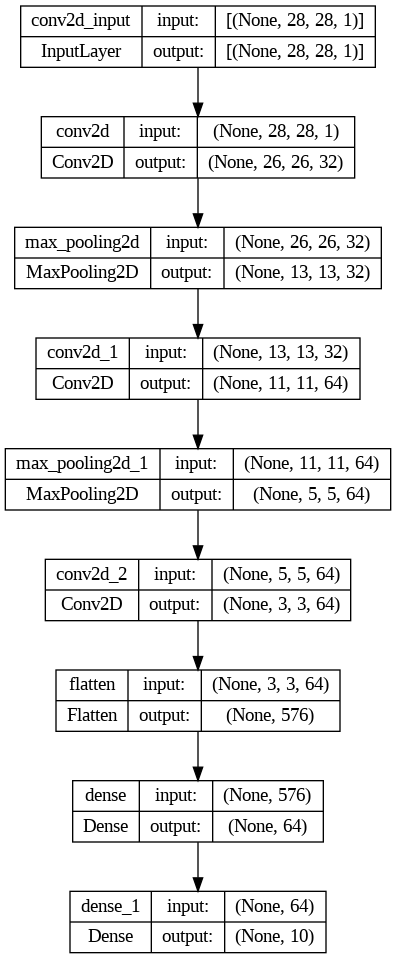

In [4]:

keras.utils.plot_model(model, show_shapes=True)


In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20)


Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 0.0059 - accuracy: 0.9984
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0054 - accuracy: 0.9983
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0052 - accuracy: 0.9981
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0053 - accuracy: 0.9983
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0065 - accuracy: 0.9981
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0050 - accuracy: 0.9984
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0045 - accuracy: 0.9988
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0054 - accuracy: 0.9984
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0038 - accuracy: 0.9987
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0

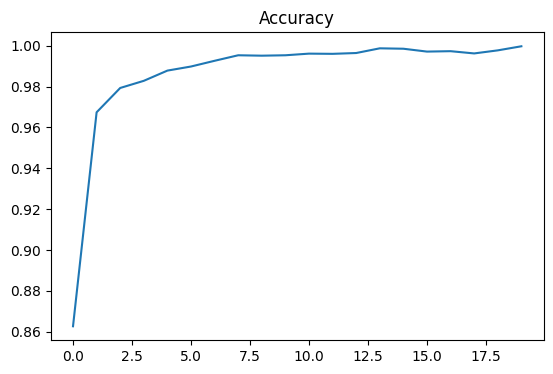

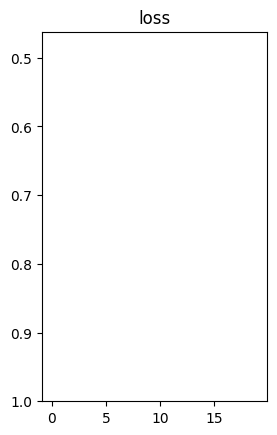

313/313 [==============================] - 1s 2ms/step


AttributeError: ignored

In [54]:
import matplotlib.pyplot as plt

#
# [DIY-1] training history를 이용홰서 loss와 accuracy 그래프 그리기
#
plt.figure(figsize=(14, 4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.show()

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.title('loss')
plt.ylim(1)
plt.show()
#
# [DIY-2] test 데이터에 모델 적용하고 정확도 계산
#
result = model.predict(test_images)
result
print(result.score)
